In [2]:
# Import modules
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import yaml

In [3]:
# Set variables (interactively)
SHIP_AGE = 20
START_YEAR = 2021
SIM_YEARS = 50

In [4]:
# Function for ship selection
def select_ship(spec, cost, year):
    opex_sum    = spec.num_sf * cost.Seafarer[year] \
                + spec.num_so * cost.ShoreOpe[year] \
                + spec.sec_cost * cost.CS[year] \
                + spec.com_cost * cost.Comm[year]
    capex_sum   = spec.sa_cost * cost.Situ[year] \
                + spec.pl_cost * cost.Plan[year] \
                + spec.ex_cost * cost.Exec[year] \
                + spec.ro_cost * cost.RemOpe[year] \
                + spec.rm_cost * cost.RemMon[year]
    ac_loss     = spec.acc_ratio * cost.ExpLoss[year]
    annual_cost = opex_sum + capex_sum/SHIP_AGE + ac_loss
    sf_sum      = spec.num_sf + spec.num_so
    select      = annual_cost.idxmin()
    
    return select, annual_cost, opex_sum, capex_sum, ac_loss, sf_sum

In [28]:
def get_scenario(scenario='scenario_1'):
    check = True
    folder_pass = 'yml/'
    while check:
        try:
            with open(folder_pass + scenario + ".yml") as yml:
                scenario = yaml.load(yml,Loader = yaml.SafeLoader)
            check = False
        except:
            print(FILE_ERROR_MESSAGE)
            get_files(folder_pass)
            scenario = input("Set scenario of ship %s (yml filename wo/extention)" % str(id)) # set each ship scenario
    
    ship_initial = scenario['ship_demand']['initial_number']
    annual_growth = scenario['ship_demand']['annual_growth']
    ship_age = scenario['ship_age']
    start_year = scenario['sim_setting']['start_year']
    end_year = scenario['sim_setting']['end_year']
    sim_years = end_year - start_year + 1
    
    NumofShip = [0] * sim_years
    Newbuilding = [0] * sim_years
    Scrap = [0] * sim_years    
    for i in range (sim_years):
        NumofShip[i] = int(NumofShip[i-1] * annual_growth) if i>0 else ship_initial
        Scrap[i]= int(ship_initial/ship_age) if i <= ship_age else Newbuilding[i-ship_age]
        Newbuilding[i] = NumofShip[i] + Scrap[i] - NumofShip[i-1] if i>0 else int(ship_initial/ship_age)

    return NumofShip, Newbuilding, Scrap

In [36]:
# Set by yaml
def get_scenario(scenario='scenario_1'):
    check = True
    folder_pass = 'yml/'
    while check:
        try:
            with open(folder_pass + scenario + ".yml") as yml:
                scenario = yaml.load(yml,Loader = yaml.SafeLoader)
            check = False
        except:
            print(FILE_ERROR_MESSAGE)
            get_files(folder_pass)
            scenario = input("Set scenario %s (yml filename wo/extention)" % str(id)) # set each ship scenario
    
    ship_initial = scenario['ship_demand']['initial_number']
    annual_growth = scenario['ship_demand']['annual_growth']
    ship_age = scenario['ship_age']
    start_year = scenario['sim_setting']['start_year']
    end_year = scenario['sim_setting']['end_year']

    Year = list(range(start_year, end_year))
    sim_years = len(Year)
    
    NumofShip = [0] * sim_years
    Newbuilding = [0] * sim_years
    Scrap = [0] * sim_years    
    for i in range (sim_years):
        NumofShip[i] = int(NumofShip[i-1] * annual_growth) if i>0 else ship_initial
        Scrap[i]= int(ship_initial/ship_age) if i <= ship_age else Newbuilding[i-ship_age]
        Newbuilding[i] = NumofShip[i] + Scrap[i] - NumofShip[i-1] if i>0 else int(ship_initial/ship_age)

    return Year, NumofShip, Newbuilding, Scrap

In [41]:
def get_cost(Year, cost='cost_1'):
    check = True
    folder_pass = 'yml/'
    while check:
        try:
            with open(folder_pass + cost + ".yml") as yml:
                cost = yaml.load(yml,Loader = yaml.SafeLoader)
            check = False
        except:
            print(FILE_ERROR_MESSAGE)
            get_files(folder_pass)
            cost = input("Set cost of ship %s (yml filename wo/extention)" % str(id)) # set each ship cost
    
    sf_cost_initial = cost['seafarer_cost']['initial_number']
    sf_cost_growth = cost['seafarer_cost']['annual_growth']
    so_cost_initial = cost['shore_operator_cost']['initial_number']
    so_cost_growth = cost['shore_operator_cost']['annual_growth']
    loss_initial = cost['exp_loss']['initial_number']
    loss_growth = cost['exp_loss']['annual_growth']
    cs_initial = cost['opex_cyber_security']['initial_number']
    cs_growth = cost['opex_cyber_security']['annual_growth']
    com_initial = cost['opex_communication']['initial_number']
    com_growth = cost['opex_communication']['annual_growth']
    sa_initial = cost['capex_situation_awareness']['initial_number']
    sa_growth = cost['capex_situation_awareness']['annual_growth']
    pl_initial = cost['capex_planning']['initial_number']
    pl_growth = cost['capex_planning']['annual_growth']
    ex_initial = cost['capex_execution']['initial_number']
    ex_growth = cost['capex_execution']['annual_growth']
    ro_initial = cost['capex_remote_operation']['initial_number']
    ro_growth = cost['capex_remote_operation']['annual_growth']
    rm_initial = cost['capex_remote_monitoring']['initial_number']
    rm_growth = cost['capex_remote_monitoring']['annual_growth']    

    sim_years = len(Year)
    Seafarer = [0] * sim_years
    ShoreOperator = [0] * sim_years
    ExpLoss = [0] * sim_years  
    CS = [0] * sim_years
    Comm = [0] * sim_years
    Situ = [0] * sim_years
    Plan = [0] * sim_years
    Exec = [0] * sim_years
    RemOpe = [0] * sim_years
    RemMon = [0] * sim_years   

    for i in range (sim_years):
        Seafarer[i] = int(Seafarer[i-1] * sf_cost_growth) if i>0 else sf_cost_initial
        ShoreOperator[i] = int(ShoreOperator[i-1] * so_cost_growth) if i>0 else so_cost_initial
        ExpLoss[i] = int(ExpLoss[i-1] * loss_growth) if i>0 else loss_initial
        CS[i] = int(CS[i-1] * cs_growth) if i>0 else cs_initial
        Comm[i] = int(Comm[i-1] * com_growth) if i>0 else com_initial
        Situ[i] = int(Situ[i-1] * sa_growth) if i>0 else sa_initial
        Plan[i] = int(Plan[i-1] * pl_growth) if i>0 else pl_initial
        Exec[i] = int(Exec[i-1] * ex_growth) if i>0 else ex_initial
        RemOpe[i] = int(RemOpe[i-1] * ro_growth) if i>0 else ro_initial
        RemMon[i] = int(RemMon[i-1] * rm_growth) if i>0 else rm_initial

    return Year, Seafarer, ShoreOperator, ExpLoss, CS, Comm, Situ, Plan, Exec, RemOpe, RemMon

In [42]:
# Import from yaml files
Year, NumofShip, Newbuilding, Scrap = get_scenario('scenario_1')
Year, Seafarer, ShoreOperator, ExpLoss, CS, Comm, Situ, Plan, Exec, RemOpe, RemMon = get_cost('cost_1')

In [5]:
# Import from csv files
cost = pd.read_csv("csv/cost.csv")
spec = pd.read_csv("csv/spec.csv")
demand = pd.read_csv("csv/demand.csv")

In [ ]:
def get_cost(Year, cost='cost_1'):
    check = True
    folder_pass = 'yml/'
    while check:
        try:
            with open(folder_pass + cost + ".yml") as yml:
                cost = yaml.load(yml,Loader = yaml.SafeLoader)
            check = False
        except:
            print(FILE_ERROR_MESSAGE)
            get_files(folder_pass)
            cost = input("Set cost %s (yml filename wo/extention)" % str(id)) # set each ship cost
    
    sf_cost_initial = cost['seafarer_cost']['initial_number']
    sf_cost_growth = cost['seafarer_cost']['annual_growth']
    so_cost_initial = cost['shore_operator_cost']['initial_number']
    so_cost_growth = cost['shore_operator_cost']['annual_growth']
    loss_initial = cost['exp_loss']['initial_number']
    loss_growth = cost['exp_loss']['annual_growth']
    cs_initial = cost['opex_cyber_security']['initial_number']
    cs_growth = cost['opex_cyber_security']['annual_growth']
    com_initial = cost['opex_communication']['initial_number']
    com_growth = cost['opex_communication']['annual_growth']
    sa_initial = cost['capex_situation_awareness']['initial_number']
    sa_growth = cost['capex_situation_awareness']['annual_growth']
    pl_initial = cost['capex_planning']['initial_number']
    pl_growth = cost['capex_planning']['annual_growth']
    ex_initial = cost['capex_execution']['initial_number']
    ex_growth = cost['capex_execution']['annual_growth']
    ro_initial = cost['capex_remote_operation']['initial_number']
    ro_growth = cost['capex_remote_operation']['annual_growth']
    rm_initial = cost['capex_remote_monitoring']['initial_number']
    rm_growth = cost['capex_remote_monitoring']['annual_growth']    

    sim_years = len(Year)
    Seafarer = [0] * sim_years
    ShoreOperator = [0] * sim_years
    ExpLoss = [0] * sim_years  
    CS = [0] * sim_years
    Comm = [0] * sim_years
    Situ = [0] * sim_years
    Plan = [0] * sim_years
    Exec = [0] * sim_years
    RemOpe = [0] * sim_years
    RemMon = [0] * sim_years   

    for i in range (sim_years):
        Seafarer[i] = int(Seafarer[i-1] * sf_cost_growth) if i>0 else sf_cost_initial
        ShoreOperator[i] = int(ShoreOperator[i-1] * so_cost_growth) if i>0 else so_cost_initial
        ExpLoss[i] = int(ExpLoss[i-1] * loss_growth) if i>0 else loss_initial
        CS[i] = int(CS[i-1] * cs_growth) if i>0 else cs_initial
        Comm[i] = int(Comm[i-1] * com_growth) if i>0 else com_initial
        Situ[i] = int(Situ[i-1] * sa_growth) if i>0 else sa_initial
        Plan[i] = int(Plan[i-1] * pl_growth) if i>0 else pl_initial
        Exec[i] = int(Exec[i-1] * ex_growth) if i>0 else ex_initial
        RemOpe[i] = int(RemOpe[i-1] * ro_growth) if i>0 else ro_initial
        RemMon[i] = int(RemMon[i-1] * rm_growth) if i>0 else rm_initial

    return Year, Seafarer, ShoreOperator, ExpLoss, CS, Comm, Situ, Plan, Exec, RemOpe, RemMon

In [57]:
def get_spec(spec='spec_1'):
    check = True
    folder_pass = 'yml/'
    while check:
        try:
            with open(folder_pass + spec + ".yml") as yml:
                spec = yaml.load(yml,Loader = yaml.SafeLoader)
            check = False
        except:
            print(FILE_ERROR_MESSAGE)
            get_files(folder_pass)
            spec = input("Set spec %s (yml filename wo/extention)" % str(id)) # set each ship spec

    options = len(spec['SituationAwareness']) * len(spec['Control']) * len(spec['Control']) * len(spec['Remote'])

    ship_type = [''] * options
    SituationAwareness = [''] * options
    for i in range(options):
        ship_type[i] = 'ship_' + str(i+1)
        
    # これって効率的なのか…

    # sf_spec_initial = spec['seafarer_spec']['initial_number']
    # sf_spec_growth = spec['seafarer_spec']['annual_growth']
    # so_spec_initial = spec['shore_operator_spec']['initial_number']
    # so_spec_growth = spec['shore_operator_spec']['annual_growth']
    # loss_initial = spec['exp_loss']['initial_number']
    # loss_growth = spec['exp_loss']['annual_growth']
    # cs_initial = spec['opex_cyber_security']['initial_number']
    # cs_growth = spec['opex_cyber_security']['annual_growth']
    # com_initial = spec['opex_communication']['initial_number']
    # com_growth = spec['opex_communication']['annual_growth']
    # sa_initial = spec['capex_situation_awareness']['initial_number']
    # sa_growth = spec['capex_situation_awareness']['annual_growth']
    # pl_initial = spec['capex_planning']['initial_number']
    # pl_growth = spec['capex_planning']['annual_growth']
    # ex_initial = spec['capex_execution']['initial_number']
    # ex_growth = spec['capex_execution']['annual_growth']
    # ro_initial = spec['capex_remote_operation']['initial_number']
    # ro_growth = spec['capex_remote_operation']['annual_growth']
    # rm_initial = spec['capex_remote_monitoring']['initial_number']
    # rm_growth = spec['capex_remote_monitoring']['annual_growth']    

    # sim_years = len(Year)
    # Seafarer = [0] * sim_years
    # ShoreOperator = [0] * sim_years
    # ExpLoss = [0] * sim_years  
    # CS = [0] * sim_years
    # Comm = [0] * sim_years
    # Situ = [0] * sim_years
    # Plan = [0] * sim_years
    # Exec = [0] * sim_years
    # RemOpe = [0] * sim_years
    # RemMon = [0] * sim_years   

    # for i in range (sim_years):
    #     Seafarer[i] = int(Seafarer[i-1] * sf_spec_growth) if i>0 else sf_spec_initial
    #     ShoreOperator[i] = int(ShoreOperator[i-1] * so_spec_growth) if i>0 else so_spec_initial
    #     ExpLoss[i] = int(ExpLoss[i-1] * loss_growth) if i>0 else loss_initial
    #     CS[i] = int(CS[i-1] * cs_growth) if i>0 else cs_initial
    #     Comm[i] = int(Comm[i-1] * com_growth) if i>0 else com_initial
    #     Situ[i] = int(Situ[i-1] * sa_growth) if i>0 else sa_initial
    #     Plan[i] = int(Plan[i-1] * pl_growth) if i>0 else pl_initial
    #     Exec[i] = int(Exec[i-1] * ex_growth) if i>0 else ex_initial
    #     RemOpe[i] = int(RemOpe[i-1] * ro_growth) if i>0 else ro_initial
    #     RemMon[i] = int(RemMon[i-1] * rm_growth) if i>0 else rm_initial

    # return Year, Seafarer, ShoreOperator, ExpLoss, CS, Comm, Situ, Plan, Exec, RemOpe, RemMon

In [58]:
get_spec()

KeyError: 0

In [17]:
#@title What is your choice?　{ run: "auto" }

Fuel = 'HFO' #@param ['Ammonia or Hydrogen','LNG','HFO']
Lookout_System = 'As is' #@param ['Fully Automated','Automated w/ Human','As is']
Routing_and_Collision_Avoidance_System = 'Automated w/ Human' #@param ['Fully Automated','Automated w/ Human','As is']
Controller_and_Actuator = 'Fully Automated' #@param ['Fully Automated','Automated w/ Human','As is']
Machinery_Maintenance = 'As is' #@param ['Fully Automated','Automated w/ Human','As is']
Berthing_System = 'Fully Automated' #@param ['Fully Automated','Automated w/ Human','As is']
Shore_Support_System = 'For Remote Operation' #@param ['For Remote Operation','For Remote Monitoring','As is']

picked_items = [
    Fuel, Lookout_System, Routing_and_Collision_Avoidance_System, 
    Controller_and_Actuator, Machinery_Maintenance, Berthing_System,
    Shore_Support_System
]

total_value = 0
for (mor, pic) in zip(morphological_matrix, picked_items):
    print(f"{mor['item']} is {pic}, and the value is {mor[pic]}.")
    total_value += mor[pic]

print(f"\nThe total value is {total_value}.")

Fuel is HFO, and the value is 3.
Lookout System (SOED) is As is, and the value is 5.
Routing and Collision Avoidance System (SERPP)	 is Automated w/ Human, and the value is 4.
Controller and Actuator is Fully Automated, and the value is 0.
Machinery Maintenance is As is, and the value is 2.
Berthing System is Fully Automated, and the value is 0.
Shore Support System is For Remote Operation, and the value is 3.

The total value is 17.


In [6]:
# Modify input (Interactively)

spec['sa_cost'] = 0
spec['sa_cost'][spec['SituationAwareness'].isin(['FullAuto'])] = 1
spec['sa_cost'][spec['SituationAwareness'].isin(['SemiAuto'])] = 0.5
spec['pl_cost'] = 0
spec['pl_cost'][spec['Planning'].isin(['FullAuto'])] = 1
spec['pl_cost'][spec['Planning'].isin(['SemiAuto'])] = 0.5
spec['ex_cost'] = 0
spec['ex_cost'][spec['Control'].isin(['FullAuto'])] = 1
spec['ex_cost'][spec['Control'].isin(['SemiAuto'])] = 0.5
spec['ro_cost'] = 0
spec['ro_cost'][spec['Remote'].isin(['Control'])] = 1
spec['rm_cost'] = 0
spec['rm_cost'][spec['Remote'].isin(['Monitor'])] = 1

C:\Users\NAKASH~1\AppData\Local\Temp/ipykernel_25304/970531464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spec['sa_cost'][spec['SituationAwareness'].isin(['FullAuto'])] = 1
C:\Users\NAKASH~1\AppData\Local\Temp/ipykernel_25304/970531464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spec['sa_cost'][spec['SituationAwareness'].isin(['SemiAuto'])] = 0.5
C:\Users\NAKASH~1\AppData\Local\Temp/ipykernel_25304/970531464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

year= 2050


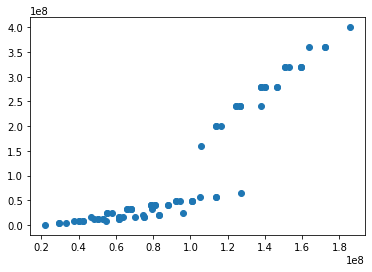

In [7]:
# Select Ship
select = [0] * 50
labels = []

for i in range(50):
    select[i], annual_cost, opex_sum, capex_sum, ac_loss, sf_sum = select_ship(spec, cost, i)

    # Show tradespace
    if cost.Year[i] == 2050:
        print('year=', cost.Year[i])
        plt.scatter(x=annual_cost, y=ac_loss*sf_sum)
        # for j, label in enumerate(spec.index.values):
        #     plt.text(annual_cost[j], ac_loss[j]* sf_sum[j], label)

In [8]:
# Initial setting
for i in list(set(spec.ship_type[select])):
    demand[i] = 0
demand[spec.ship_type[80]] = 0

# Calculate numbers
demand[spec.ship_type[80]][0] = demand.NumofShip[0] # Initial num of ship
for i in range(50):
    demand[spec.ship_type[select[i]]][i] = demand.Newbuilding[i]
    if i >= 1:
        demand[spec.ship_type[select[i]]][i] = demand[spec.ship_type[select[i]]][i-1] + demand.Newbuilding[i]
    if i-SHIP_AGE > 0:
        demand[spec.ship_type[select[i-SHIP_AGE-1]]][i] -= demand.Newbuilding[i-SHIP_AGE-1]
    if i >= 1 and i <= SHIP_AGE:
        demand[spec.ship_type[80]][i] = demand[spec.ship_type[80]][i-1] - demand['Scrap'][i]   

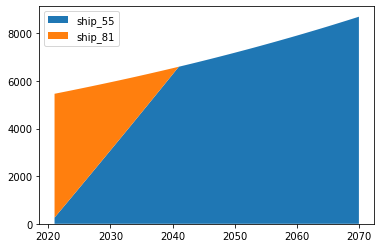

In [9]:
# Show output
labels = list(set(spec.ship_type[select]))
labels.append(spec.ship_type[80])
fig, ax = plt.subplots()
ax.stackplot(demand.Year, demand[spec.ship_type[select[0]]], demand[spec.ship_type[80]], labels=labels)
ax.legend(loc="upper left")

plt.show()

In [14]:
spec[spec.ship_type.isin(spec.ship_type[select])]

,ship_type,SituationAwareness,Planning,Control,Remote,num_sf,num_so,sec_cost,com_cost,acc_ratio,add_port_cost,sa_cost,pl_cost,ex_cost,ro_cost,rm_cost
54,ship_55,FullAuto,FullAuto,FullAuto,NaN,0,0,10,1,0.1,1,1.0,1.0,1.0,0,0
